![cactus](http://cactuscode.org/global/images/cactuslogo.png)
# Compiling Cactus!
Step 1 is to download the code. Cactus uses a script named "GetComponents" to find and prepare all the source code modules that it needs for a given installation. The GetComponents script can be downloaded with a simple invocation of curl.

In [37]:
import os
os.environ["PATH"]="/opt/conda/envs/python2/bin:"+os.environ["PATH"]

In [38]:
!python --version

Python 2.7.13


In [39]:
%cd ~/
!curl -kLO https://raw.githubusercontent.com/gridaphobe/CRL/ET_2016_11/GetComponents

/home/jovyan
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 99330  100 99330    0     0  1072k      0 --:--:-- --:--:-- --:--:-- 1077k


Step 2 is to download your thornlist. In this tutorial, we are going to use Funwave, a collection of thorns
designed to simulate water waves using the Boussinesq equations.

In [4]:
!curl -kLO https://bitbucket.org/stevenrbrandt/cajunwave/raw/master/funwave_carpet.th

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3994  100  3994    0     0  23985      0 --:--:-- --:--:-- --:--:-- 24060


You can view a file in the notebook by using the "magic" command "%pycat filename". However, it tries to highlight
syntax as if the file is written in python. In those cases you can simply use "%cat filename." Unfortunately, unlike %pycat, %cat leaves the contents of the file on the screen.

Note that at the top of the file is "DEFINE_ROOT = CactusFW2". This means that Cactus, and all its thorns, will be checked out under that directory.

In [5]:
%pycat ~/funwave_carpet.th

Next we need to checkout the components listed in the thornlist. We do this with the GetComponents command.
Before we can execute it, however, we need to turn on its execute bit.

In [6]:
%cd ~/
!chmod a+x GetComponents
!echo no|./GetComponents --parallel funwave_carpet.th

/home/jovyan
-----------------------------------------------------------------
  Checking out module: CONTRIBUTORS
      from repository: https://bitbucket.org/cactuscode/cactus.git
                 into: CactusFW2
                   as: flesh
-----------------------------------------------------------------
  Checking out module: COPYRIGHT
      from repository: https://bitbucket.org/cactuscode/cactus.git
                 into: CactusFW2
                   as: flesh
-----------------------------------------------------------------
  Checking out module: doc
      from repository: https://bitbucket.org/cactuscode/cactus.git
                 into: CactusFW2
                   as: flesh
-----------------------------------------------------------------
  Checking out module: lib
      from repository: https://bitbucket.org/cactuscode/cactus.git
                 into: CactusFW2
                   as: flesh
-----------------------------------------------------------------
  Checking out mod

-----------------------------------------------------------------
  Checking out module: Carpet/CarpetInterp2
      from repository: https://bitbucket.org/eschnett/carpet.git
                 into: CactusFW2/arrangements
-----------------------------------------------------------------
  Checking out module: Carpet/CarpetRegrid2
      from repository: https://bitbucket.org/eschnett/carpet.git
                 into: CactusFW2/arrangements
-----------------------------------------------------------------
  Checking out module: Carpet/CarpetTracker
      from repository: https://bitbucket.org/eschnett/carpet.git
                 into: CactusFW2/arrangements
-----------------------------------------------------------------
  Checking out module: CactusCoastal/Funwave
      from repository: https://bitbucket.org/stevenrbrandt/cajunwave.git
                 into: CactusFW2/arrangements
-----------------------------------------------------------------
  Checking out module: CactusBase/CartGri

In [7]:
%cd ~/CactusFW2

/home/jovyan/CactusFW2


<img src="http://simfactory.org/global/images/factory.png" width="200px">

# Simfactory
Cactus is normally built with a tool called Simfactory. Simfactory, in turn, will call make.
Before it can work, however, it needs to be configured. Please replace... my email address in the
command below with yours. The email address isn't sent anywhere, all it's used for is allowing
Cactus to send job change state notifications to you.

In [43]:
%cd ~/CactusFW2
!./simfactory/bin/sim setup-silent --setup-email=sbrandt@cct.lsu.edu 

/home/jovyan/CactusFW2


Here we will define some necessary Simulation Factory defaults.


Determining local machine name: s6tk1z-jupyteret-pmzr5

--------------------SUMMARY--------------------:


[default]
user            = jovyan
email           = sbrandt@cct.lsu.edu
allocation      = NO_ALLOCATION


------------------END SUMMARY------------------:

Contents successfully written to /home/jovyan/CactusFW2/repos/simfactory2/etc/defs.local.ini


At long last, we are ready to actually build Cactus. Cactus can often figure out what compilers and build
options to use automatically, but in some cases it is necessary to specify it by hand (you can do this by adding --optionlist=centos.cfg to the build command below). The file containing
this information is called the Option List. You might want to take a look at it.

This is the command to build Cactus using our thornlist. As written, it will build in parallel using two processes. That's what the -j option does.

In [46]:
!rm -fr configs

In [47]:
!time ./simfactory/bin/sim build -j 2 --thornlist=./repos/cajunwave/funwave_carpet.th 

Using configuration: sim
Reconfiguring sim
Writing configuration to: /home/jovyan/CactusFW2/configs/sim/OptionList
Cactus - version: 4.2.3
Reconfiguring sim.
Using configuration options from configure line
  Setting fds to '4,5 --'
End of options from configure line
Adding configuration options from '/home/jovyan/CactusFW2/configs/sim/OptionList'...
  Setting VERSION to '2017-07-25'
  Setting CPP to 'cpp'
  Setting FPP to 'cpp'
  Setting CC to 'gcc'
  Setting CXX to 'g++'
  Setting F77 to 'gfortran'
  Setting F90 to 'gfortran'
  Setting CPPFLAGS to '-DMPICH_IGNORE_CXX_SEEK'
  Setting FPPFLAGS to '-traditional'
  Setting CFLAGS to '-g3 -std=gnu99 -rdynamic -Wunused-variable'
  Setting CXXFLAGS to '-g3 -std=c++0x -rdynamic -Wunused-variable -fno-inline'
  Setting F77FLAGS to '-g3 -fcray-pointer -ffixed-line-length-none'
  Setting F90FLAGS to '-g3 -fcray-pointer -ffixed-line-length-none'
  Setting LIBS to 'numa gfortran'
  Setting LIBDIRS to ''
  Setting DEBUG to 'no'
  Setting CPP_DEBUG_

checking for dladdr... no
checking for dladdr in library dl... yes
checking for backtrace... yes
checking for backtrace_symbols... yes
checking for crypt... no
checking for crypt in library crypt... yes
checking for finite in header math.h and library m... yes
checking for copysign in header math.h and library m... yes
checking for fpclassify in header math.h and library m... yes
checking for isfinite in header math.h and library m... yes
checking for isinf in header math.h and library m... yes
checking for isnan in header math.h and library m... yes
checking for isnormal in header math.h and library m... yes
checking for signbit in header math.h and library m... yes
checking for mkstemp... yes
checking for va_copy... yes
creating cctk_Archdefs.h
creating make.arch.defn
creating cctk_Extradefs.h
creating make.extra.defn
updating cache ./config.cache
creating ./config.status
creating make.config.defn
creating make.config.deps
creating make.config.rules
creating cctk_Config.h
Determining

          0 Global, 0 Restricted, 63 Private parameters
   CarpetIOBasic
          0 Global, 0 Restricted, 15 Private parameters
   CarpetIOHDF5
          0 Global, 0 Restricted, 77 Private parameters
   CarpetIOScalar
          0 Global, 0 Restricted, 9 Private parameters
   CarpetInterp
          0 Global, 0 Restricted, 5 Private parameters
   CarpetInterp2
          0 Global, 0 Restricted, 3 Private parameters
   CarpetLib
          0 Global, 5 Restricted, 31 Private parameters
   CarpetMask
          0 Global, 0 Restricted, 8 Private parameters
   CarpetReduce
          0 Global, 0 Restricted, 3 Private parameters
   CarpetRegrid
          0 Global, 5 Restricted, 65 Private parameters
   CarpetRegrid2
          0 Global, 0 Restricted, 135 Private parameters
   CarpetSlab
          0 Global, 0 Restricted, 0 Private parameters
   CarpetTracker
          0 Global, 0 Restricted, 3 Private parameters
   CartGrid3D
          0 Global, 23 Restricted, 10 Private parameters
   CoordBase
   

COMPILING arrangements/AEIThorns/AEILocalInterp/src/common/store.c
COMPILING configs/sim/bindings/build/Boundary/cctk_ThornBindings.c
Creating /home/jovyan/CactusFW2/configs/sim/lib/libthorn_Boundary.a
Checking status of thorn CycleClock
COMPILING arrangements/Carpet/CycleClock/src/clock.cc
COMPILING arrangements/Carpet/CycleClock/src/cycle.cc
COMPILING arrangements/AEIThorns/AEILocalInterp/src/Lagrange-tensor-product/1d.cube.order1.smooth0.c
COMPILING configs/sim/bindings/build/CycleClock/cctk_ThornBindings.c
Creating /home/jovyan/CactusFW2/configs/sim/lib/libthorn_CycleClock.a
Checking status of thorn Vectors
COMPILING arrangements/CactusUtils/Vectors/src/vectors.cc
COMPILING arrangements/AEIThorns/AEILocalInterp/src/Lagrange-tensor-product/1d.cube.order2.smooth0.c
COMPILING arrangements/AEIThorns/AEILocalInterp/src/Lagrange-tensor-product/1d.cube.order3.smooth0.c
COMPILING arrangements/CactusUtils/Vectors/src/test.cc
COMPILING arrangements/AEIThorns/AEILocalInterp/src/Lagrange-tenso

COMPILING arrangements/AEIThorns/AEILocalInterp/src/Hermite/2d.cube.order2.c
COMPILING arrangements/AEIThorns/AEILocalInterp/src/Hermite/2d.cube.order3.c
COMPILING arrangements/AEIThorns/AEILocalInterp/src/Hermite/3d.cube.order2.c
COMPILING configs/sim/bindings/build/AEILocalInterp/cctk_ThornBindings.c
COMPILING arrangements/AEIThorns/AEILocalInterp/src/Hermite/3d.cube.order3.c
Checking status of thorn FunwaveMesh
COMPILING arrangements/CactusCoastal/FunwaveMesh/src/ADCIRCMesh.c
COMPILING configs/sim/bindings/build/FunwaveMesh/cctk_ThornBindings.c
Creating /home/jovyan/CactusFW2/configs/sim/lib/libthorn_FunwaveMesh.a
Checking status of thorn IOASCII
COMPILING arrangements/CactusBase/IOASCII/src/Startup.c
COMPILING arrangements/CactusBase/IOASCII/src/ChooseOutput.c
COMPILING arrangements/CactusBase/IOASCII/src/Output1D.c
COMPILING arrangements/CactusBase/IOASCII/src/Write1D.c
COMPILING arrangements/CactusBase/IOASCII/src/Output2D.c
COMPILING arrangements/CactusBase/IOASCII/src/Write2D.c

COMPILING configs/sim/bindings/Functions/IOASCII_Functions.c
COMPILING configs/sim/bindings/Functions/IOBasic_Functions.c
COMPILING configs/sim/bindings/Functions/IOUtil_Functions.c
COMPILING configs/sim/bindings/Functions/InterpToArray_Functions.c
COMPILING configs/sim/bindings/Functions/LoopControl_Functions.c
COMPILING configs/sim/bindings/Functions/MoL_Functions.c
COMPILING configs/sim/bindings/Functions/NaNChecker_Functions.c
COMPILING configs/sim/bindings/Functions/SphericalSurface_Functions.c
COMPILING configs/sim/bindings/Functions/SymBase_Functions.c
COMPILING configs/sim/bindings/Functions/SystemTopology_Functions.c
COMPILING configs/sim/bindings/Functions/TestLoopControl_Functions.c
COMPILING configs/sim/bindings/Functions/Timers_Functions.c
COMPILING configs/sim/bindings/Functions/Tridiagonal_Functions.c
COMPILING configs/sim/bindings/Functions/Tridiagonal2_Functions.c
COMPILING configs/sim/bindings/Implementations/ImplementationBindings.c
COMPILING configs/sim/bindings/Par

COMPILING configs/sim/bindings/Schedule/ScheduleCarpetLib.c
COMPILING configs/sim/bindings/Schedule/ScheduleCarpetMask.c
COMPILING configs/sim/bindings/Schedule/ScheduleCarpetReduce.c
COMPILING configs/sim/bindings/Schedule/ScheduleCarpetRegrid.c
COMPILING configs/sim/bindings/Schedule/ScheduleCarpetRegrid2.c
COMPILING configs/sim/bindings/Schedule/ScheduleCarpetSlab.c
COMPILING configs/sim/bindings/Schedule/ScheduleCarpetTracker.c
COMPILING configs/sim/bindings/Schedule/ScheduleCartGrid3D.c
COMPILING configs/sim/bindings/Schedule/ScheduleCoordBase.c
COMPILING configs/sim/bindings/Schedule/ScheduleCycleClock.c
COMPILING configs/sim/bindings/Schedule/ScheduleDissipation.c
COMPILING configs/sim/bindings/Schedule/ScheduleFortran.c
COMPILING configs/sim/bindings/Schedule/ScheduleFunwave.c
COMPILING arrangements/CactusNumerical/LocalReduce/src/ReductionNormInf.c
COMPILING configs/sim/bindings/Schedule/ScheduleFunwaveCoord.c
COMPILING configs/sim/bindings/Schedule/ScheduleFunwaveMesh.c
COMPI

COMPILING src/comm/Interp.c
COMPILING src/comm/Reduction.c
COMPILING src/util/CactusTimers.c
COMPILING src/util/File.c
COMPILING src/util/ParseFile.c
COMPILING src/util/RegisterKeyedFunction.c
COMPILING src/util/StoreKeyedData.c
COMPILING src/util/StoreNamedData.c
COMPILING src/util/Misc.c
COMPILING arrangements/CactusCoastal/Tridiagonal2/src/trid_test_x.cc
COMPILING src/util/StoreHandledData.c
COMPILING src/util/SKBinTree.c
COMPILING src/util/Hash.c
COMPILING src/util/Malloc.c
COMPILING arrangements/CactusCoastal/Tridiagonal2/src/trid_test_y.cc
COMPILING src/util/Math.c
COMPILING src/util/String.c
COMPILING src/util/StringList.c
COMPILING arrangements/CactusCoastal/Tridiagonal2/src/solve_x.cc
COMPILING src/util/Table.c
COMPILING src/util/Time.c
COMPILING arrangements/CactusCoastal/Tridiagonal2/src/solve_y.cc
COMPILING src/util/Network.c
COMPILING src/main/ActiveThorns.c
COMPILING arrangements/CactusCoastal/Tridiagonal2/src/trid_extern.cc
COMPILING src/main/Banner.c
COMPILING src/main/

COMPILING arrangements/Carpet/CarpetLib/src/restrict_3d_stagger011.cc
COMPILING arrangements/Carpet/CarpetLib/src/restrict_3d_stagger101.cc
COMPILING arrangements/Carpet/CarpetLib/src/restrict_3d_stagger110.cc
COMPILING arrangements/Carpet/CarpetLib/src/restrict_3d_stagger111.cc
COMPILING arrangements/Carpet/CarpetLib/src/restrict_3d_vc_rf2.cc
COMPILING arrangements/Carpet/CarpetLib/src/restrict_3d_dgfe_rf2.cc
COMPILING arrangements/Carpet/CarpetLib/src/restrict_4d_rf2.cc
COMPILING arrangements/Carpet/CarpetLib/src/prolongate_3d_stagger011.cc
COMPILING arrangements/Carpet/CarpetLib/src/prolongate_3d_stagger101.cc
COMPILING arrangements/Carpet/CarpetLib/src/prolongate_3d_stagger110.cc
COMPILING arrangements/Carpet/CarpetLib/src/prolongate_3d_stagger111.cc
COMPILING arrangements/Carpet/CarpetLib/src/prolongate_3d_rf2.cc
COMPILING arrangements/Carpet/CarpetLib/src/prolongate_3d_cc_rf2.cc
COMPILING arrangements/Carpet/CarpetLib/src/prolongate_3d_cc_eno_rf2.cc
COMPILING arrangements/Carpet/

/home/jovyan/CactusFW2/configs/sim/build/CarpetIOHDF5/OutputSlice.cc: In instantiation of ‘static int CarpetIOHDF5::IOHDF5<outdim>::WriteHDF5(const cGH*, hid_t&, hid_t&, std::vector<gdata*>, const bbox<int, 3>&, int, const vect<int, 3>&, const vect<int, outdim>&, int, int, int, int, int, int, CCTK_REAL8, const vect<double, 3>&, const vect<double, 3>&) [with int outdim = 3; cGH = _cGH; hid_t = int; CCTK_REAL8 = double]’:
/home/jovyan/CactusFW2/configs/sim/build/CarpetIOHDF5/OutputSlice.cc:1610:16:   required from here
/home/jovyan/CactusFW2/configs/sim/build/CarpetIOHDF5/OutputSlice.cc:1394:17: warning: unused variable ‘lc’ [-Wunused-variable]
COMPILING arrangements/Carpet/CarpetReduce/src/mask_coords.cc
COMPILING arrangements/Carpet/CarpetReduce/src/reduce.cc
COMPILING configs/sim/bindings/build/CarpetReduce/cctk_ThornBindings.c
Creating /home/jovyan/CactusFW2/configs/sim/lib/libthorn_CarpetReduce.a
Checking status of thorn CarpetRegrid
COMPILING arrangements/Carpet/CarpetRegrid/src/au

Creating hdf5_merge in /home/jovyan/CactusFW2/exe/sim from /home/jovyan/CactusFW2/configs/sim/build/HDF5/hdf5_merge.o
Creating hdf5_extract in /home/jovyan/CactusFW2/exe/sim from /home/jovyan/CactusFW2/configs/sim/build/HDF5/hdf5_extract.o
Creating hdf5_double_to_single in /home/jovyan/CactusFW2/exe/sim from /home/jovyan/CactusFW2/configs/sim/build/HDF5/hdf5_double_to_single.o
Done.
540.21user 46.67system 6:39.15elapsed 147%CPU (0avgtext+0avgdata 510696maxresident)k
328inputs+2960200outputs (1major+14808903minor)pagefaults 0swaps


The build command creates a configuration called "sim". It is found in the "configs/sim" directory. One of the files in this directory is the ThornList. It contains the list of thorns Cactus will compile. If you wish to add or remove a thorn from your configuration, you can do it by editing this file. However, by doing so you risk confusing yourself by forgetting what you've done. Proceed at your own risk!

In [48]:
%ls ~/CactusFW2/configs/sim

bindings/     config-info  OptionList      RunScript     ThornList
build/        datestamp.o  piraha/         scratch/
config-data/  lib/         properties.ini  SubmitScript


In [49]:
%pycat ~/CactusFW2/configs/sim/ThornList

The "OptionList" file contains all the configuration options (the things you saw in centos.cfg). Unlike the ThornList file, however, changing this file will have no effect. If you wish to change your configuration options without starting over from scratch, you should edit the file "configs/sim/config-data/make.config.defn."

In [50]:
%pycat ~/CactusFW2/configs/sim/config-data/make.config.defn

In [56]:
# Simfactory supplies a config file from its "machine database" or "mdb." This script
# figures out which one it copied by identifying the most similar file in the machine dabase.

# The smaller the number returned by this function, the more
# alike strings a and b are to each other.
def similarity_distance(a,b):
    d = {}
    for c in a:
        if c in d:
            d[c] += 1
        else:
            d[c] = 1
    for c in b:
        if c in d:
            d[c] -= 1
        else:
            d[c] = -1
    sum = 0
    for k in d:
        v = d[k]
        if v < 0:
            sum -= v
        else:
            sum += v
    return sum

import os
my_options = open(os.environ["HOME"]+"/CactusFW2/configs/sim/OptionList").read()
mdb_dir = os.environ["HOME"]+"/CactusFW2/simfactory/mdb/optionlists"
print("mdb_dir="+mdb_dir)
best_choice = None # The best choice for a similar cfg file so far
min_dist = 1e15 # a super big number...
# For each machine in the database
for file in os.listdir(mdb_dir):
    full_path = mdb_dir+"/"+file
    # Read in the contents of the cfg file
    file_options = open(full_path).read()
    dist = similarity_distance(file_options,my_options)
    # Update the best_choice of cfg file if we have
    # a shorter similarity distance.
    if dist < min_dist:
        min_dist = dist
        best_choice = file
print("Most similar optionlist in the Simfactory mdb was:",best_choice)
os.environ["BEST_CHOICE"]=best_choice

mdb_dir=/home/jovyan/CactusFW2/simfactory/mdb/optionlists
Most similar optionlist in the Simfactory mdb was: jupyteret.cfg


In [59]:
# Take a look at the cfg file to see what it looks like.
!cat ./repos/simfactory2/mdb/optionlists/${BEST_CHOICE}

# Jupyter Einstein Toolkit Workship VM
#
# Yum install command line needed to make this work:
#
# yum -y install mpich mpich-devel mpich-autoload.x86_64 gsl gsl-devel libjpeg-devel gcc gcc-c++ gcc-gfortran patch numactl-devel numactl hwloc hwloc-devel subversion git openssl-devel lapack-static openssh-server make which libtool-ltdl-devel hdf5 hdf5-devel

# Whenever this version string changes, the application is configured 
# and rebuilt from scratch 
VERSION = 2017-07-25

CPP = cpp
FPP = cpp
CC  = gcc
CXX = g++
F77 = gfortran
F90 = gfortran

CPPFLAGS = -DMPICH_IGNORE_CXX_SEEK 
FPPFLAGS = -traditional

CFLAGS   =  -g3 -std=gnu99 -rdynamic -Wunused-variable 
CXXFLAGS =  -g3 -std=c++0x -rdynamic -Wunused-variable -fno-inline
F77FLAGS =  -g3 -fcray-pointer -ffixed-line-length-none
F90FLAGS =  -g3 -fcray-pointer -ffixed-line-length-none

LIBS = numa gfortran

LIBDIRS =  

DEBUG           = no
CPP_DEBUG_FLAGS = -DCARPET_DEBUG
FPP_DEBUG_FLAGS = -DCARPET_DEBUG
C_DEBUG_FLAGS   = -O0 
CXX_DEBUG

<h1>Running Cactus!</h1>

In [60]:
%cd ~/CactusFW2

/home/jovyan/CactusFW2


Below we are going to run a simple Gaussian water wave over a flat seabed. We will use MPI and run on two processes. You can edit the parameter file below and hit shift-Enter to write it to disk. The special sequence "%%writefile filename" at the top makes this possible. Alternatively, you can load an existing file by putting the special sequence "%load filename" at the top of a cell and hitting shift-Enter.

In [61]:
%%writefile ~/CactusFW2/wave.par

#Reorder the parameters for easy comparison to the input.txt in example 3
ActiveThorns = "
  CoordBase FunWave FunwaveCoord CartGrid3D Carpet CarpetIOASCII
  CartGrid3D IOUtil CarpetIOBasic CarpetSlab Boundary SymBase MoL
  CarpetReduce LocalReduce InitBase CarpetLib LoopControl Tridiagonal
  CarpetIOScalar "

#----------------------------------------------------
# Flesh and CCTK parameters
#----------------------------------------------------

# flesh
Cactus::cctk_run_title = "Test Run"
Cactus::cctk_show_schedule = "yes"
Cactus::cctk_itlast = 300
Cactus::allow_mixeddim_gfs = "yes"

# CartGrid3D
CartGrid3D::type = "coordbase"
CartGrid3D::avoid_origin = "no"
CoordBase::domainsize = "minmax"
CoordBase::spacing    = "gridspacing"
CoordBase::xmin =  0
CoordBase::xmax =  30
CoordBase::ymin =  0
CoordBase::ymax =  30
CoordBase::zmin =  0.0
CoordBase::zmax =  0.0
CoordBase::dx   =  0.25
CoordBase::dy   =  0.25

CoordBase::boundary_size_x_lower     = 3
CoordBase::boundary_size_x_upper     = 3
CoordBase::boundary_size_y_lower     = 3
CoordBase::boundary_size_y_upper     = 3
CoordBase::boundary_size_z_lower     = 0
CoordBase::boundary_size_z_upper     = 0
CoordBase::boundary_shiftout_x_lower = 1
CoordBase::boundary_shiftout_x_upper = 1
CoordBase::boundary_shiftout_y_lower = 1
CoordBase::boundary_shiftout_y_upper = 1
CoordBase::boundary_shiftout_z_lower = 1
CoordBase::boundary_shiftout_z_upper = 1

# Carpet
Carpet::domain_from_coordbase = "yes"
Carpet::ghost_size_x = 3
Carpet::ghost_size_y = 3
Carpet::ghost_size_z = 1
carpet::adaptive_stepsize = yes

# MoL
MoL::ODE_Method = "RK3"
MoL::disable_prolongation        = "yes"

# the output dir will be named after the parameter file name
IO::out_dir = $parfile
IO::out_fileinfo="none"
IOBasic::outInfo_every = 1
IOBasic::outInfo_vars = "FunWave::eta FunWave::u FunWave::v"

#IOASCII::out1D_every = 1
#IOASCII::out1d_vars = "FunWave::eta Funwave::depth"
CarpetIOASCII::compact_format = false
IOASCII::out2D_every = 30
IOASCII::out2D_xyplane_z = 0
IOASCII::out2D_vars = "FunWave::eta FunWave::u FunWave::v"
IOASCII::out2D_xz = "no"
IOASCII::out2D_yz = "no"
IOASCII::output_ghost_points = "no"

IOScalar::outScalar_every = 1
IOScalar::outScalar_vars = "FunWave::eta FunWave::u FunWave::v"

#& = "Funwave::eta"

#----------------------------------------------------
# Funwave parameters
#----------------------------------------------------

# Funwave depth 
FunWave::depth_file_offset_x = 3
FunWave::depth_file_offset_y = 3
FunWave::depth_type = "flat"
FunWave::depth_format = "ele"
FunWave::depth_file = "/tmp/__depth__.txt"
FunWave::depth_flat = 0.8
#Funwave::test_depth_shore_x = 80
#Funwave::test_depth_island_x = 40
#Funwave::test_depth_island_y = 40
FunWave::depth_xslp = 10.0
FunWave::depth_slope = 0.05
FunWave::dt_size = 0
Funwave::generate_test_depth_data = true
Funwave::num_wave_components = 1
Funwave::wave_component_file = "/home/sbrandt/workspace/shi_funwave/example_2/fft/wavemk_per_amp_pha.txt"
Funwave::peak_period = 1

# import
Funwave::time_ramp = 1.0
Funwave::delta_wk = 0.5
Funwave::dep_wk = 0.45
Funwave::xc_wk = 3.0
Funwave::ywidth_wk = 10000.0
Funwave::tperiod = 1.0
Funwave::amp_wk = 0.0232
Funwave::theta_wk = 0.0
Funwave::freqpeak = 0.2
Funwave::freqmin = 0.1
Funwave::freqmax = 0.4
Funwave::hmo = 1.0
Funwave::gammatma = 5.0
Funwave::thetapeak = 10.0
Funwave::sigma_theta = 15.0

# Funwave wind forcing
Funwave::wind_force = false
Funwave::use_wind_mask = false
Funwave::num_time_wind_data = 2
Funwave::timewind[0] = 0
Funwave::wu[0] = 25
Funwave::wv[0] = 50
Funwave::timewind[1] = 1000
Funwave::wu[1] = 100
Funwave::wv[1] = 100
Funwave::boundary = funwave

# Funwave wave maker
FunWave::wavemaker_type = "ini_gau"
FunWave::xc = 26.5
FunWave::yc = 26.9
FunWave::amp =  2.0
FunWave::wid =  1
Funwave::wdep = 0.78
Funwave::xwavemaker = 25.0

# Funwave sponge 
FunWave::sponge_on = false
FunWave::sponge_west_width = 2.0
FunWave::sponge_east_width = 2.0
FunWave::sponge_north_width = 0.0
FunWave::sponge_south_width = 0.0
FunWave::sponge_decay_rate = 0.9
FunWave::sponge_damping_magnitude = 5.0

# Funwave dispersion (example 3 enables dispersion)
FunWave::dispersion_on = "true"
FunWave::gamma1 = 1.0
FunWave::gamma2 = 1.0
FunWave::gamma3 = 1.0
FunWave::beta_ref = -0.531
FunWave::swe_eta_dep = 0.80
FunWave::cd = 0.0

# Funwave numerics (MoL parameter controls time integration scheme)
FunWave::reconstruction_scheme = "fourth"
FunWave::riemann_solver = "HLLC"
FunWave::dtfac = 0.5
FunWave::froudecap = 10.0
FunWave::mindepth = 0.001
FunWave::mindepthfrc = 0.001
FunWave::enable_masks = "true"
Funwave::estimate_dt_on = "true"

FunwaveCoord::spherical_coordinates = false

ActiveThorns = "CarpetIOHDF5"
IOHDF5::out2D_xyplane_z = 0 
IOHDF5::out2D_every = 10
IOHDF5::out2D_vars = " 
  FunWave::eta
  FunWave::u
  FunWave::v
  Grid::Coordinates{out_every=1000000000}
"
IOHDF5::out2D_xz = no
IOHDF5::out2D_yz = no

Overwriting /home/jovyan/CactusFW2/wave.par


This next cell deletes our simulation in case we want to throw it away and start over again for some reason.

In [65]:
!rm -fr ~/simulations/wave

At long last, we are ready run Cactus. This configuration specifies running on two threads, with 1 thread per process. To execute this command, Cactus uses a "RunScript" stored in configs/sim/RunScript. You might want to take a look at it. Identifiers sandwiched between @ symbols get replaced by Simfactory prior to execution.

In [66]:
!cat ~/CactusFW2/configs/sim/RunScript

#!/bin/bash
source ~/.bashrc

echo "Preparing:"
set -x                          # Output commands
#set -e                          # Abort on errors

echo "Checking:"
pwd
hostname
date

echo "Environment:"
export CACTUS_NUM_PROCS=@NUM_PROCS@
export CACTUS_NUM_THREADS=@NUM_THREADS@
export GMON_OUT_PREFIX=gmon.out
export OMP_NUM_THREADS=@NUM_THREADS@
#env | sort > SIMFACTORY/ENVIRONMENT
PARFILE=@PARFILE@
echo PARFILE is @PARFILE@
echo @RUNDIR@ > /tmp/log.out
echo @SOURCEDIR@ >> /tmp/log.out
pwd >> /tmp/log.out
if [ ! -r @PARFILE@ ]
then
    PARFILE=$(echo $PARFILE|perl -p -e 's{output-\d+}{SIMFACTORY/par}')
fi
echo PARFILE IS $PARFILE

echo "Starting:"
export CACTUS_STARTTIME=$(date +%s)

if [ ${CACTUS_NUM_PROCS} = 1 ]; then
   	@EXECUTABLE@ -L 3 $PARFILE
else
	/usr/bin/mpirun -np @NUM_PROCS@ @EXECUTABLE@ -L 3 $PARFILE
fi

echo "Stopping:"
date


Enough already! Let's run Cactus!

In [67]:
%cd ~/CactusFW2
!./simfactory/bin/sim create-run --procs 2 --num-threads 1 wave.par

/home/jovyan/CactusFW2
Parameter file: /home/jovyan/CactusFW2/wave.par
Skeleton Created
Job directory: "/home/jovyan/simulations/wave"
Executable: "/home/jovyan/CactusFW2/exe/cactus_sim"
Option list: "/home/jovyan/simulations/wave/SIMFACTORY/cfg/OptionList"
Submit script: "/home/jovyan/simulations/wave/SIMFACTORY/run/SubmitScript"
Run script: "/home/jovyan/simulations/wave/SIMFACTORY/run/RunScript"
Parameter file: "/home/jovyan/simulations/wave/SIMFACTORY/par/wave.par"
Simulation name: wave
Assigned restart id: 0 
Running simulation wave
Preparing:
+ echo Checking:
Checking:
+ pwd
/home/jovyan/simulations/wave/output-0000
+ hostname
s6tk1z-jupyteret-pmzr5
+ date
Wed Jul 26 14:43:08 UTC 2017
+ echo Environment:
Environment:
+ export CACTUS_NUM_PROCS=2
+ CACTUS_NUM_PROCS=2
+ export CACTUS_NUM_THREADS=1
+ CACTUS_NUM_THREADS=1
+ export GMON_OUT_PREFIX=gmon.out
+ GMON_OUT_PREFIX=gmon.out
+ export OMP_NUM_THREADS=1
+ OMP_NUM_THREADS=1
+ PARFILE=/home/jovyan/simulations/wave/output-0000/wave.

INFO (CycleClock): Calibrated CycleClock: 0.400002 ns per clock tick (2.49999 GHz)
  ____       _          __        __              
 / ___|__ _ (_)_   _ _ _\ \      / /_ ___   _____ 
| |   / _` || | | | | '_ \ \ /\ / / _` \ \ / / _ \
| |__| (_| || | |_| | | | \ V  V / (_| |\ V /  __/
 \____\__,_|/ |\__,_|_| |_|\_/\_/ \__,_| \_/ \___|
          |__/                                    
INFO (Vectors): Using vector size 1 for architecture scalar (no vectorisation, 64-bit precision)
--------------------------------------------------------------------------------
AMR driver provided by Carpet
--------------------------------------------------------------------------------
AMR info I/O provided by CarpetIOBasic
--------------------------------------------------------------------------------
AMR 0D ASCII I/O provided by CarpetIOASCII
--------------------------------------------------------------------------------
AMR 1D ASCII I/O provided by CarpetIOASCII
-----------------------------------

        3     1.048 |   -0.7827099    0.7827247 |   -0.7908120    0.7945910 | -2.204493e-13    1.7406879
        4     1.071 |   -0.9871958    0.9871304 |   -1.0078458    1.0085949 | -8.400691e-14    1.5989647
        5     1.094 |   -1.1744423    1.1742063 |   -1.1909363    1.1836515 | -1.710410e-15    1.4476202
        6     1.117 |   -1.3292681    1.3289617 |   -1.3316063    1.3201955 | -1.152414e-14    1.2961226
        7     1.140 |   -1.4464243    1.4460941 |   -1.4436961    1.4892265 | -7.675744e-14    1.1507342
        8     1.162 |   -1.5469224    1.5458777 |   -1.6224632    1.6048745 | -9.317621e-16    1.0141344
        9     1.185 |   -1.6090563    1.6066068 |   -1.7050094    1.6735034 | -3.912694e-15    0.8880859
       10     1.208 |   -1.6386679    1.6345209 |   -1.7530102    1.7107463 | -4.626260e-15    0.7717948
       11     1.230 |   -1.8563836    1.8480030 |   -1.7674885    1.7295325 | -2.510327e-14    0.6754319
       12     1.253 |   -1.6739634    1.6693377 |   -1.

       70     2.615 |   -1.4642912    0.2767483 |   -1.4057981    0.2590229 |   -0.2137260    0.5887379
       71     2.640 |   -1.4474711    0.2761392 |   -1.3962712    0.2583219 |   -0.1941274    0.5831460
       72     2.664 |   -1.4513894    0.2742674 |   -1.4019325    0.2548907 |   -0.1721779    0.5784937
       73     2.688 |   -1.4414570    0.2710084 |   -1.3995690    0.2490426 |   -0.1655913    0.5714285
       74     2.713 |   -1.4288063    0.2647984 |   -1.3864879    0.2420549 |   -0.1676511    0.5688352
       75     2.738 |   -1.4283104    0.2554700 |   -1.3908008    0.2340046 |   -0.1698992    0.5647703
       76     2.762 |   -1.4137836    0.2437063 |   -1.3822609    0.2265682 |   -0.1718507    0.5740248
       77     2.787 |   -1.4091300    0.2367836 |   -1.3767554    0.2179821 |   -0.1737959    0.5916501
       78     2.812 |   -1.4046636    0.2274053 |   -1.3758512    0.2130156 |   -0.1766506    0.6169808
       79     2.836 |   -1.3859611    0.2155210 |   -1.3619419  

      137     4.300 |   -1.0608795    0.2156183 |   -1.0674998    0.2167764 |   -0.3671624    0.4946664
      138     4.328 |   -1.0548312    0.2188421 |   -1.0619842    0.2287137 |   -0.3667662    0.4851986
      139     4.356 |   -1.0463378    0.2180459 |   -1.0607194    0.2396080 |   -0.3661865    0.4839073
-------------------------------------------------------------------------------------------------------
Iteration      Time |                FUNWAVE::u |                FUNWAVE::v |              FUNWAVE::eta
                    |      minimum      maximum |      minimum      maximum |      minimum      maximum
-------------------------------------------------------------------------------------------------------
      140     4.384 |   -1.0467500    0.2169481 |   -1.0500058    0.2512368 |   -0.3654015    0.4747634
      141     4.412 |   -1.0378406    0.2186419 |   -1.0497144    0.2630811 |   -0.3642819    0.4724773
      142     4.440 |   -1.0342172    0.2163659 |   -1.0453023  

      201     6.149 |   -0.8533410    0.3717816 |   -0.8152867    0.4101634 |   -0.1750078    0.3320730
      202     6.180 |   -0.8535028    0.3681777 |   -0.8146050    0.4101118 |   -0.1751810    0.3311869
      203     6.210 |   -0.8442866    0.3647292 |   -0.8119215    0.4102397 |   -0.1756846    0.3295971
      204     6.240 |   -0.8425213    0.3612682 |   -0.8052784    0.4114481 |   -0.1757903    0.3285272
      205     6.271 |   -0.8400223    0.3594254 |   -0.8062386    0.4125626 |   -0.1758510    0.3263323
      206     6.301 |   -0.8282626    0.3601502 |   -0.8010470    0.4150443 |   -0.1762802    0.3253608
      207     6.332 |   -0.8316114    0.3606417 |   -0.7985980    0.4163994 |   -0.1765009    0.3236009
      208     6.362 |   -0.8263956    0.3617883 |   -0.7971293    0.4196593 |   -0.1764601    0.3225128
      209     6.393 |   -0.8192261    0.3630934 |   -0.7894353    0.4223273 |   -0.1769458    0.3202863
      210     6.424 |   -0.8197248    0.3634221 |   -0.7909435  

      268     8.269 |   -0.6734256    0.4059333 |   -0.6535384    0.4421553 |   -0.1577800    0.2217224
      269     8.302 |   -0.6756800    0.4045318 |   -0.6554061    0.4411120 |   -0.1571127    0.2206535
      270     8.334 |   -0.6711322    0.4046642 |   -0.6501599    0.4390332 |   -0.1563702    0.2209410
      271     8.367 |   -0.6710783    0.4044379 |   -0.6510131    0.4387896 |   -0.1558859    0.2205042
      272     8.400 |   -0.6706263    0.4032953 |   -0.6504622    0.4380201 |   -0.1553208    0.2189918
      273     8.432 |   -0.6644033    0.4028924 |   -0.6438784    0.4362545 |   -0.1545145    0.2199283
      274     8.465 |   -0.6678908    0.4028691 |   -0.6477349    0.4349431 |   -0.1541124    0.2190905
      275     8.497 |   -0.6647396    0.4019592 |   -0.6447659    0.4344681 |   -0.1535710    0.2188659
      276     8.530 |   -0.6627175    0.4007857 |   -0.6422107    0.4330321 |   -0.1528491    0.2185265
      277     8.563 |   -0.6636459    0.4009477 |   -0.6438056  

Data can be found in this directory. Using the next couple of commands, we will browse it.

In [68]:
%cd ~/simulations/wave/output-0000/wave

/home/jovyan/simulations/wave/output-0000/wave


In [69]:
%ls *.asc

eta.average.asc   eta.norm_inf.asc  u.minimum.asc   v.inorm1.asc
eta.count.asc     eta.sum.asc       u.norm1.asc     v.inorm2.asc
eta.iaverage.asc  eta.xy.asc        u.norm2.asc     v.maximum.asc
eta.icount.asc    u.average.asc     u.norm_inf.asc  v.minimum.asc
eta.inorm1.asc    u.count.asc       u.sum.asc       v.norm1.asc
eta.inorm2.asc    u.iaverage.asc    u.xy.asc        v.norm2.asc
eta.maximum.asc   u.icount.asc      v.average.asc   v.norm_inf.asc
eta.minimum.asc   u.inorm1.asc      v.count.asc     v.sum.asc
eta.norm1.asc     u.inorm2.asc      v.iaverage.asc  v.xy.asc
eta.norm2.asc     u.maximum.asc     v.icount.asc


In [70]:
# This cell enables inline plotting in the notebook
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

The top of %pycat command showed us what the columns mean:
HYDROBASE::rho (hydrobase-rho)
* 1 iteration
* 2 time - how much time has passed in the simulation
* 3 the data, in this case the variable rho

Once we know all this, it is straightforward to plot the data.

In [71]:
lin_data = np.genfromtxt("eta.maximum.asc")

In [72]:
lin_data

array([[  0.00000000e+00,   0.00000000e+00,   1.99002496e+00],
       [  1.00000000e+00,   1.00000000e+00,   1.94996406e+00],
       [  2.00000000e+00,   1.02389304e+00,   1.86241266e+00],
       [  3.00000000e+00,   1.04762986e+00,   1.74068787e+00],
       [  4.00000000e+00,   1.07107653e+00,   1.59896471e+00],
       [  5.00000000e+00,   1.09418298e+00,   1.44762021e+00],
       [  6.00000000e+00,   1.11709657e+00,   1.29612256e+00],
       [  7.00000000e+00,   1.13978869e+00,   1.15073421e+00],
       [  8.00000000e+00,   1.16240215e+00,   1.01413437e+00],
       [  9.00000000e+00,   1.18498552e+00,   8.88085934e-01],
       [  1.00000000e+01,   1.20757797e+00,   7.71794829e-01],
       [  1.10000000e+01,   1.23022266e+00,   6.75431889e-01],
       [  1.20000000e+01,   1.25290639e+00,   6.20271677e-01],
       [  1.30000000e+01,   1.27523727e+00,   5.96323930e-01],
       [  1.40000000e+01,   1.29842338e+00,   5.67023511e-01],
       [  1.50000000e+01,   1.32298377e+00,   5.4988331

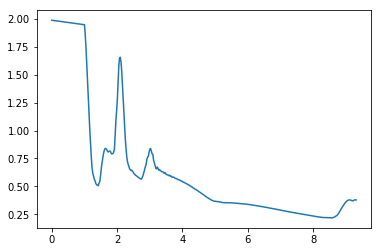

In [73]:
plt.plot(lin_data[:,1],lin_data[:,2])

Python knows how to read regularly formatted text
files that use the # character for comments. Fortunately,
that's what Cactus produces in its asc files.

In [74]:
file_data = np.genfromtxt("eta.xy.asc")

In [75]:
file_data

array([[  0.00000000e+000,   0.00000000e+000,   0.00000000e+000, ...,
         -7.50000000e-001,   0.00000000e+000,   0.00000000e+000],
       [  0.00000000e+000,   0.00000000e+000,   0.00000000e+000, ...,
         -7.50000000e-001,   0.00000000e+000,   0.00000000e+000],
       [  0.00000000e+000,   0.00000000e+000,   0.00000000e+000, ...,
         -7.50000000e-001,   0.00000000e+000,   8.00386346e-322],
       ..., 
       [  3.00000000e+002,   0.00000000e+000,   0.00000000e+000, ...,
          3.07500000e+001,   0.00000000e+000,  -4.84401952e-003],
       [  3.00000000e+002,   0.00000000e+000,   0.00000000e+000, ...,
          3.07500000e+001,   0.00000000e+000,  -7.17270258e-003],
       [  3.00000000e+002,   0.00000000e+000,   0.00000000e+000, ...,
          3.07500000e+001,   0.00000000e+000,  -1.18624657e-002]])

In [76]:
import matplotlib.cm as cm
# https://matplotlib.org/examples/color/colormaps_reference.html
cmap = cm.gist_rainbow

sets= [   0.   30.   60.   90.  120.  150.  180.  210.  240.  270.  300.]
which= 0.0
min/max= 0.0 1.99002495839


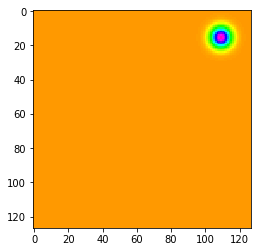

which= 30.0
min/max= -0.207923914074 0.816352882538


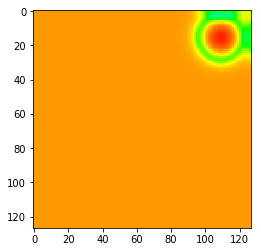

which= 60.0
min/max= -0.317305530718 0.656520120885


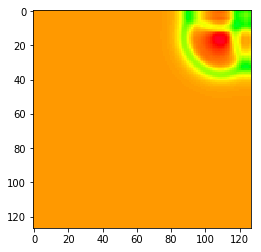

which= 90.0
min/max= -0.181076541393 0.787317058351


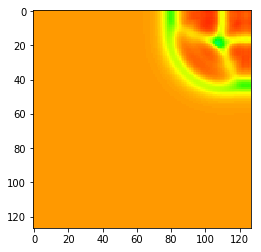

which= 120.0
min/max= -0.324171390451 0.566769020399


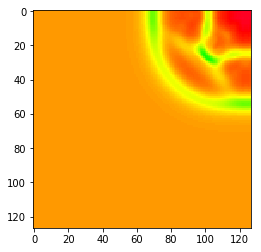

which= 150.0
min/max= -0.331607086079 0.420832876996


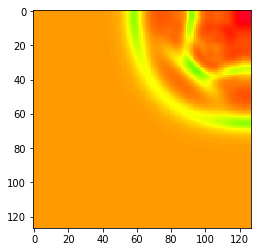

which= 180.0
min/max= -0.182986771807 0.351955557436


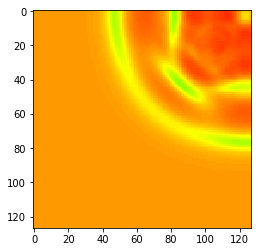

which= 210.0
min/max= -0.177226909317 0.319160530175


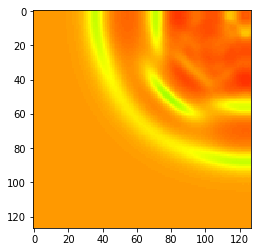

which= 240.0
min/max= -0.172527402131 0.267072575529


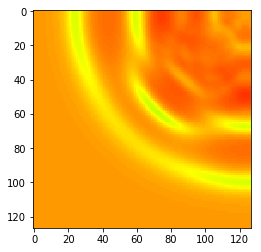

which= 270.0
min/max= -0.15637018245 0.220940999017


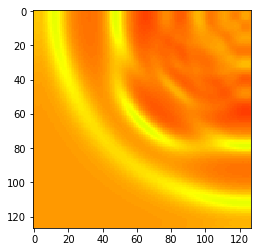

which= 300.0
min/max= -0.137407163977 0.378204176488


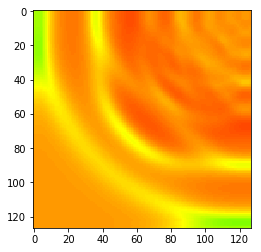

In [77]:
sets = np.unique(file_data[:,0])
width = 8
height = 4
print("sets=",sets)
mn, mx = np.min(file_data[:,12]),np.max(file_data[:,12])
for which in sets: 
    print("which=",which)
    g = file_data[file_data[:,0]==which,:]
    x = g[:,5]
    y = g[:,6]
    z = g[:,12]
    zi = z.reshape(len(np.unique(y)),len(np.unique(x)))
    print('min/max=',np.min(zi),np.max(zi))
    plt.figure(figsize=(width, height))
    plt.imshow(zi[::-1,:],cmap,clim=(mn,mx))
    plt.show()

In [78]:
%ls *.h5

eta.xy.h5  r.xy.h5  u.xy.h5  v.xy.h5  x.xy.h5  y.xy.h5  z.xy.h5


<h2>Plotting HDF5 Data</h2>
HDF5 (Hierarchical Data Format 5) is a portable binary data format. As such, it is far more efficient to read and
write than ascii formats, and it is probably what you should normally use. Here, you can see how to read and display
the data.

In [79]:
import h5py

nm= FUNWAVE::u it=0 tl=0 rl=0 c=0


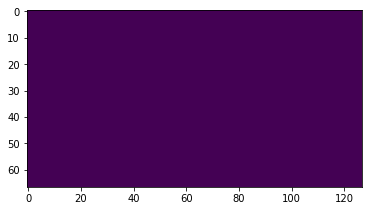

nm= FUNWAVE::u it=0 tl=0 rl=0 c=1


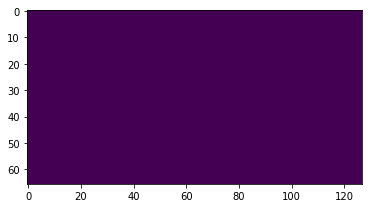

nm= FUNWAVE::u it=10 tl=0 rl=0 c=0


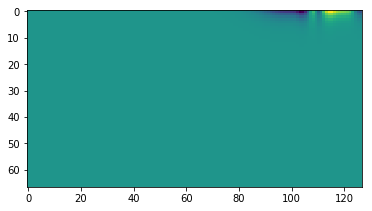

nm= FUNWAVE::u it=10 tl=0 rl=0 c=1


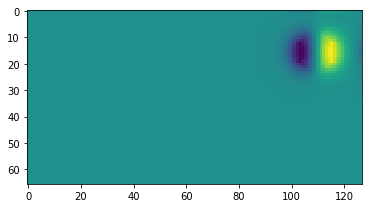

nm= FUNWAVE::u it=100 tl=0 rl=0 c=0


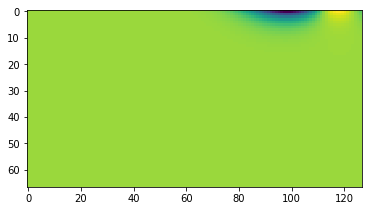

nm= FUNWAVE::u it=100 tl=0 rl=0 c=1


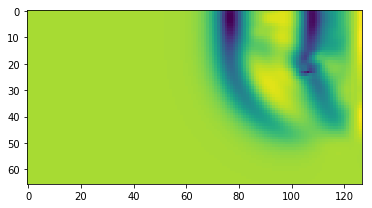

nm= FUNWAVE::u it=110 tl=0 rl=0 c=0


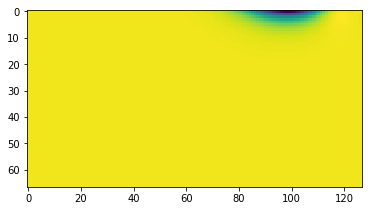

nm= FUNWAVE::u it=110 tl=0 rl=0 c=1


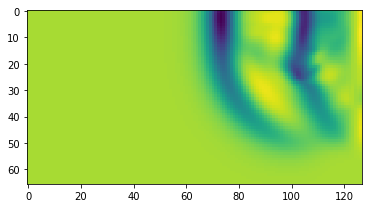

nm= FUNWAVE::u it=120 tl=0 rl=0 c=0


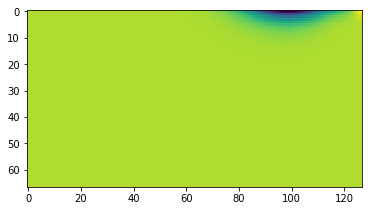

nm= FUNWAVE::u it=120 tl=0 rl=0 c=1


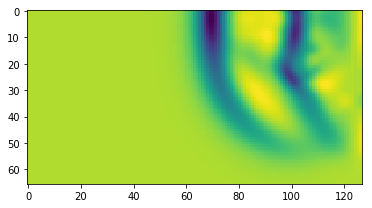

nm= FUNWAVE::u it=130 tl=0 rl=0 c=0


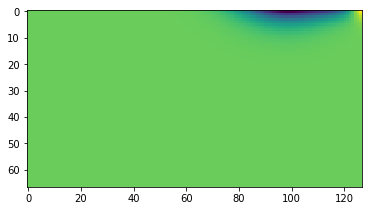

nm= FUNWAVE::u it=130 tl=0 rl=0 c=1


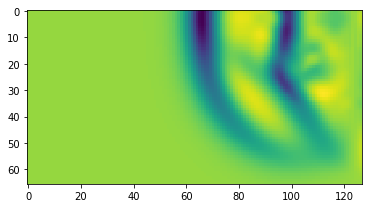

nm= FUNWAVE::u it=140 tl=0 rl=0 c=0


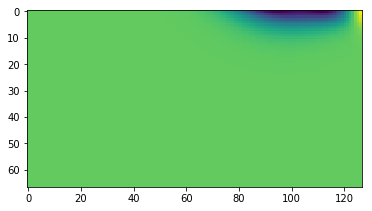

nm= FUNWAVE::u it=140 tl=0 rl=0 c=1


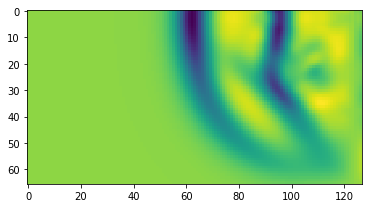

nm= FUNWAVE::u it=150 tl=0 rl=0 c=0


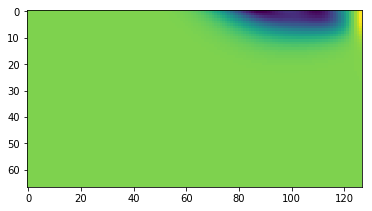

nm= FUNWAVE::u it=150 tl=0 rl=0 c=1


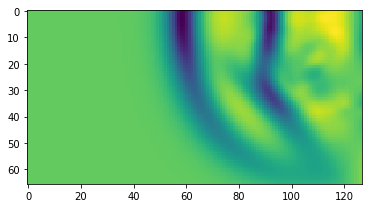

nm= FUNWAVE::u it=160 tl=0 rl=0 c=0


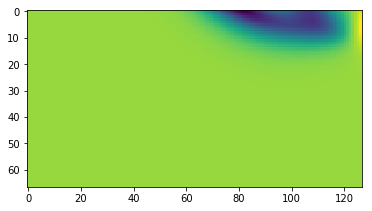

nm= FUNWAVE::u it=160 tl=0 rl=0 c=1


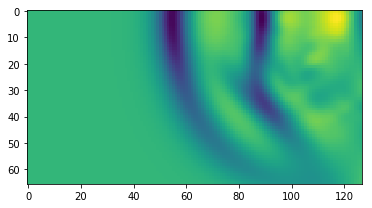

nm= FUNWAVE::u it=170 tl=0 rl=0 c=0


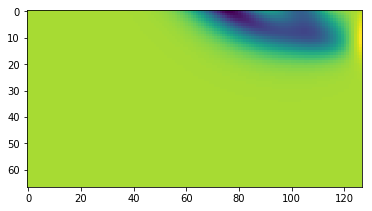

nm= FUNWAVE::u it=170 tl=0 rl=0 c=1


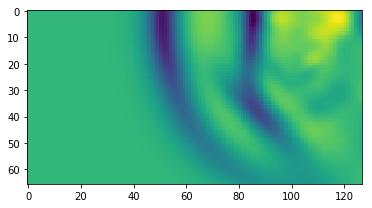

nm= FUNWAVE::u it=180 tl=0 rl=0 c=0


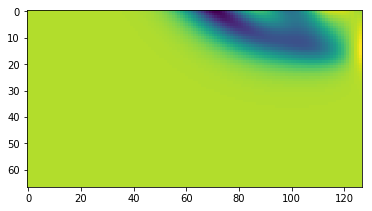

nm= FUNWAVE::u it=180 tl=0 rl=0 c=1


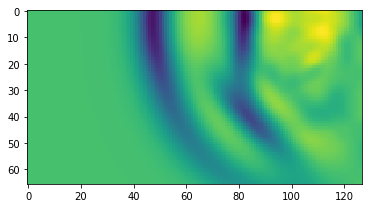

nm= FUNWAVE::u it=190 tl=0 rl=0 c=0


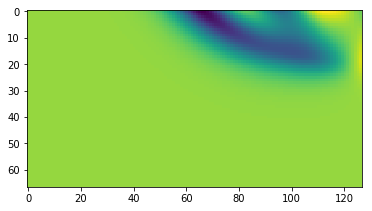

nm= FUNWAVE::u it=190 tl=0 rl=0 c=1


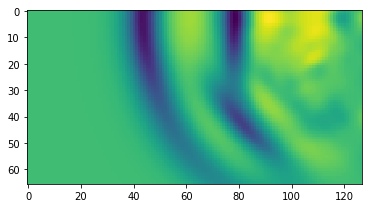

nm= FUNWAVE::u it=20 tl=0 rl=0 c=0


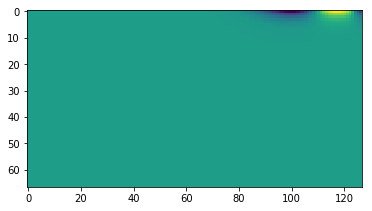

nm= FUNWAVE::u it=20 tl=0 rl=0 c=1


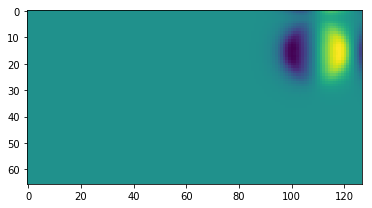

nm= FUNWAVE::u it=200 tl=0 rl=0 c=0


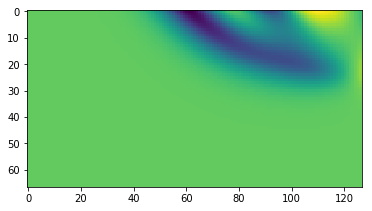

nm= FUNWAVE::u it=200 tl=0 rl=0 c=1


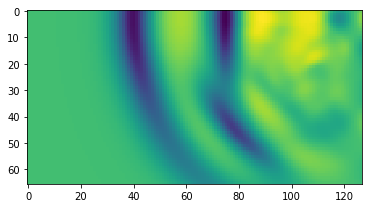

nm= FUNWAVE::u it=210 tl=0 rl=0 c=0


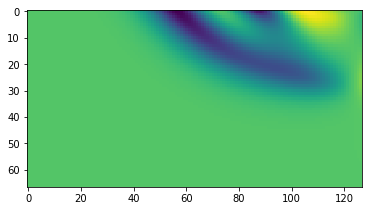

nm= FUNWAVE::u it=210 tl=0 rl=0 c=1


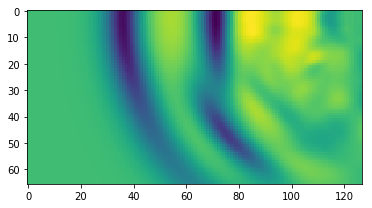

nm= FUNWAVE::u it=220 tl=0 rl=0 c=0


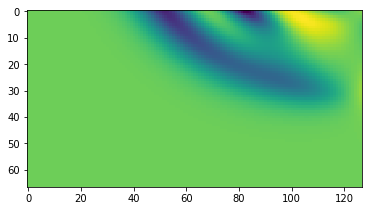

nm= FUNWAVE::u it=220 tl=0 rl=0 c=1


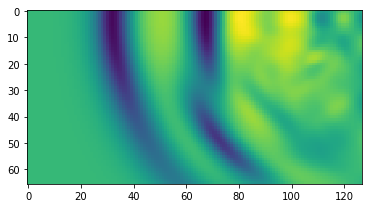

nm= FUNWAVE::u it=230 tl=0 rl=0 c=0


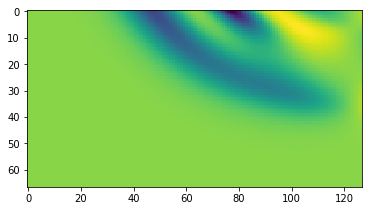

nm= FUNWAVE::u it=230 tl=0 rl=0 c=1


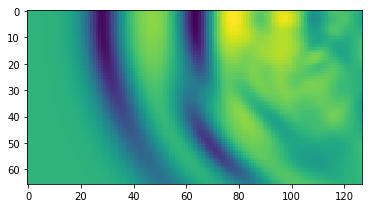

nm= FUNWAVE::u it=240 tl=0 rl=0 c=0


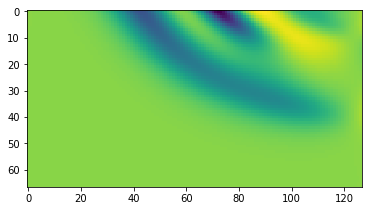

nm= FUNWAVE::u it=240 tl=0 rl=0 c=1


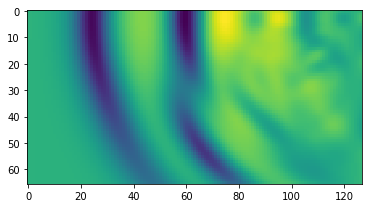

nm= FUNWAVE::u it=250 tl=0 rl=0 c=0


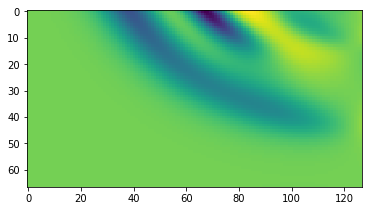

nm= FUNWAVE::u it=250 tl=0 rl=0 c=1


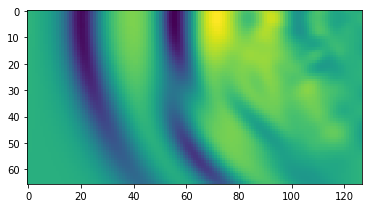

nm= FUNWAVE::u it=260 tl=0 rl=0 c=0


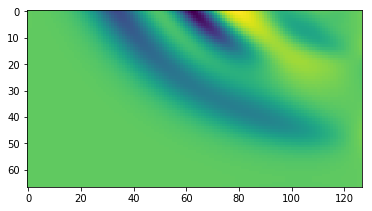

nm= FUNWAVE::u it=260 tl=0 rl=0 c=1


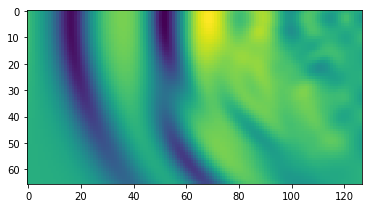

nm= FUNWAVE::u it=270 tl=0 rl=0 c=0


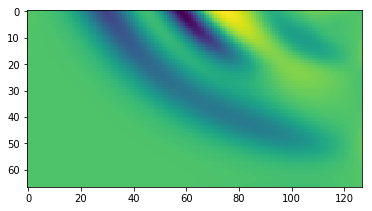

nm= FUNWAVE::u it=270 tl=0 rl=0 c=1


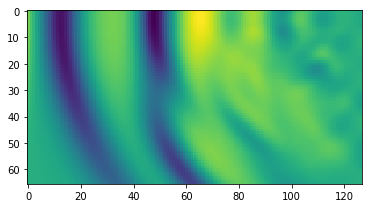

nm= FUNWAVE::u it=280 tl=0 rl=0 c=0


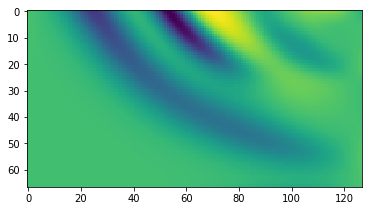

nm= FUNWAVE::u it=280 tl=0 rl=0 c=1


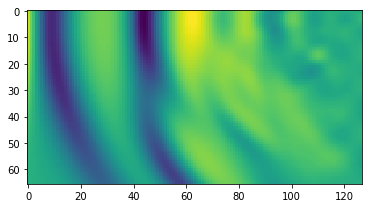

nm= FUNWAVE::u it=290 tl=0 rl=0 c=0


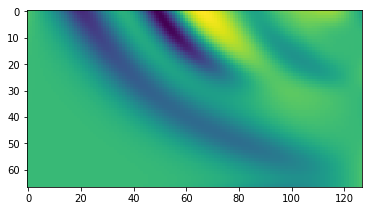

nm= FUNWAVE::u it=290 tl=0 rl=0 c=1


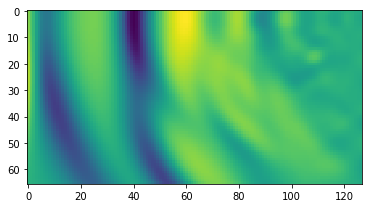

nm= FUNWAVE::u it=30 tl=0 rl=0 c=0


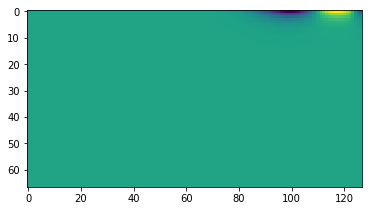

nm= FUNWAVE::u it=30 tl=0 rl=0 c=1


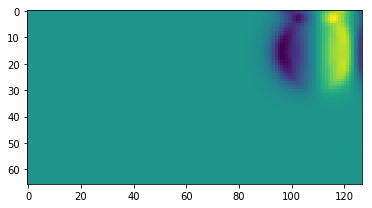

nm= FUNWAVE::u it=300 tl=0 rl=0 c=0


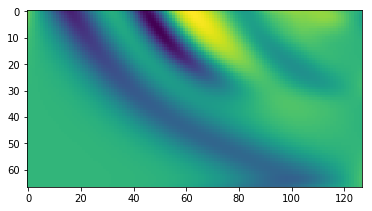

nm= FUNWAVE::u it=300 tl=0 rl=0 c=1


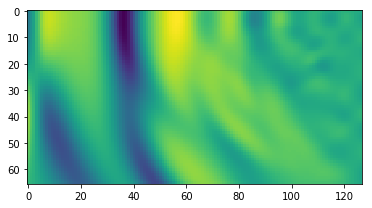

nm= FUNWAVE::u it=40 tl=0 rl=0 c=0


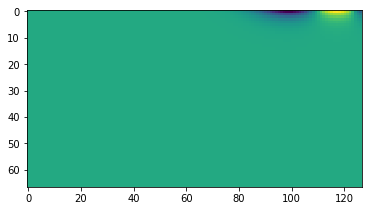

nm= FUNWAVE::u it=40 tl=0 rl=0 c=1


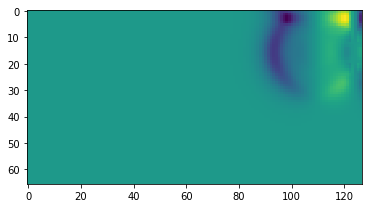

nm= FUNWAVE::u it=50 tl=0 rl=0 c=0


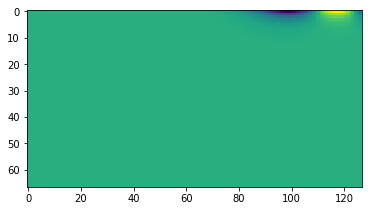

nm= FUNWAVE::u it=50 tl=0 rl=0 c=1


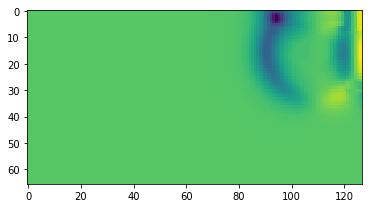

nm= FUNWAVE::u it=60 tl=0 rl=0 c=0


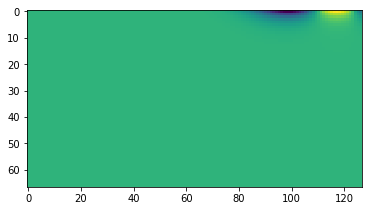

nm= FUNWAVE::u it=60 tl=0 rl=0 c=1


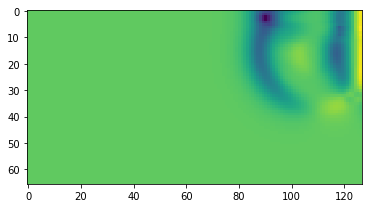

nm= FUNWAVE::u it=70 tl=0 rl=0 c=0


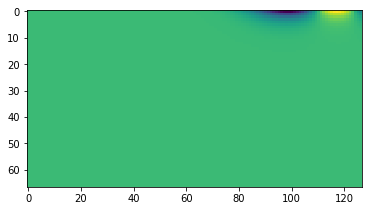

nm= FUNWAVE::u it=70 tl=0 rl=0 c=1


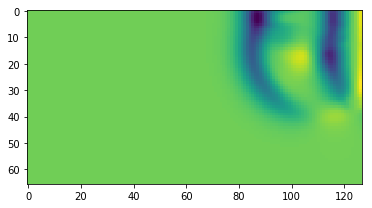

nm= FUNWAVE::u it=80 tl=0 rl=0 c=0


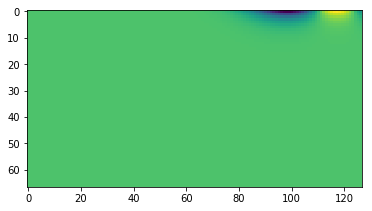

nm= FUNWAVE::u it=80 tl=0 rl=0 c=1


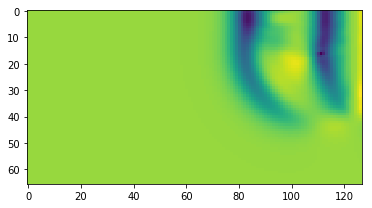

nm= FUNWAVE::u it=90 tl=0 rl=0 c=0


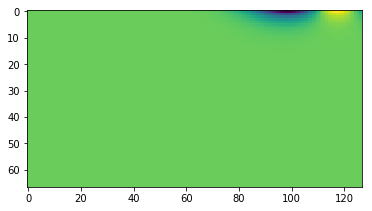

nm= FUNWAVE::u it=90 tl=0 rl=0 c=1


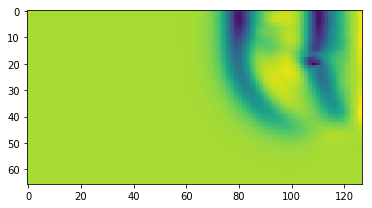

In [80]:
f5 = h5py.File("u.xy.h5")
for nm in f5:
    if not hasattr(f5[nm],"shape"):
        continue
    print("nm=",nm)
    d=np.copy(f5[nm])
    plt.figure()
    plt.imshow(d[::-1,:])
    plt.show()

Unfortunately, each set only has one component of the plot, i.e. the part belonging to one processor. To fix this, we'll
collect data sets belonging to an iteration and display them all together. In order to make this happen, we'll need the
x and y values for each component of the grid.

In [81]:
import re

In [82]:
f5x = h5py.File("x.xy.h5")
f5y = h5py.File("y.xy.h5")
x_coords = {}
y_coords = {}
for nm in f5x:
    print(nm)
    m = re.search(r'rl=.*c=\d+',nm)
    if m:
        k = m.group(0)
        x_coords[k]=np.copy(f5x[nm])
for nm in f5y:
    m = re.search(r'rl=.*c=\d+',nm)
    if m:
        k = m.group(0)
        y_coords[k]=np.copy(f5y[nm])

GRID::x it=0 tl=0 rl=0 c=0
GRID::x it=0 tl=0 rl=0 c=1
Parameters and Global Attributes


iteration= 0


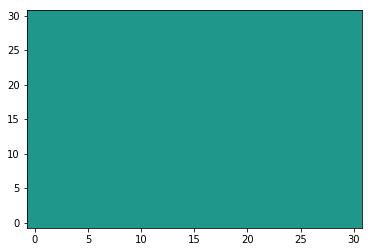

iteration= 10


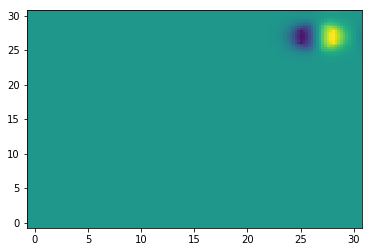

iteration= 20


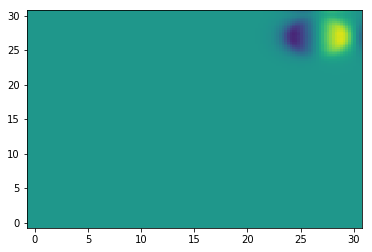

iteration= 30


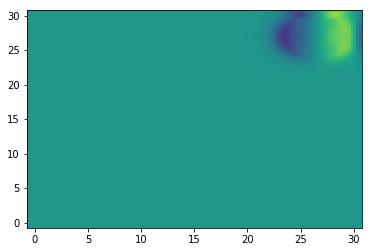

iteration= 40


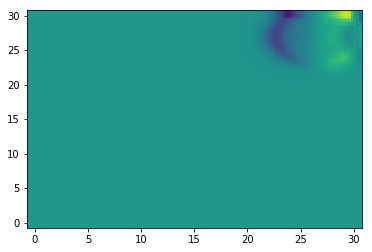

iteration= 50


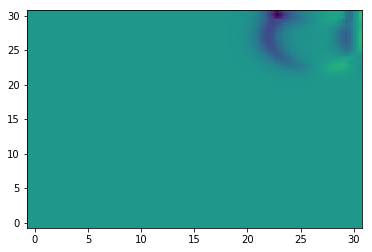

iteration= 60


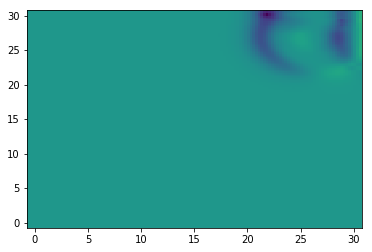

iteration= 70


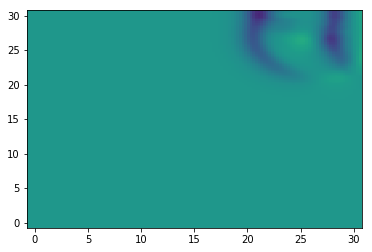

iteration= 80


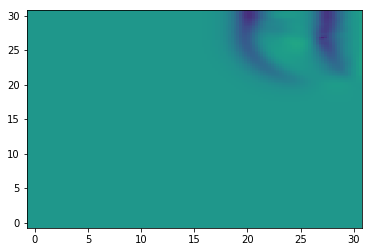

iteration= 90


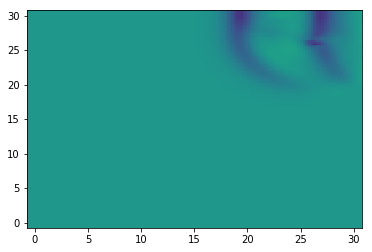

iteration= 100


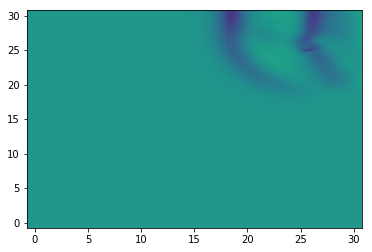

iteration= 110


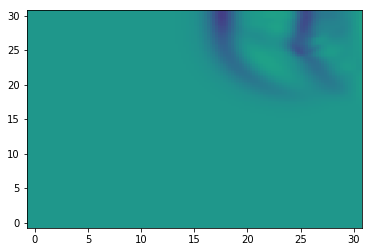

iteration= 120


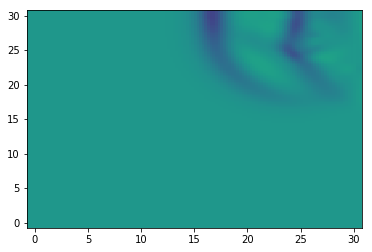

iteration= 130


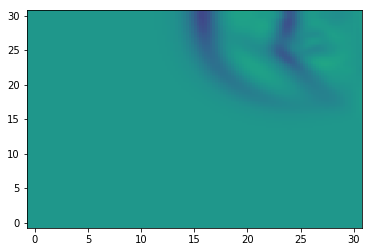

iteration= 140


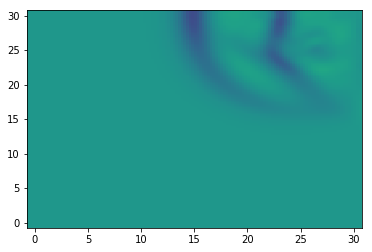

iteration= 150


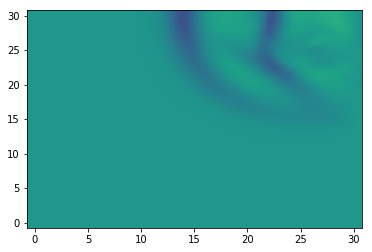

iteration= 160


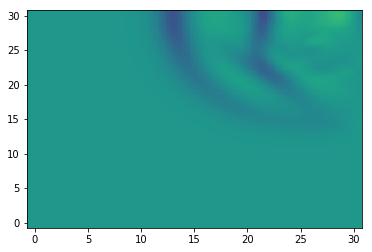

iteration= 170


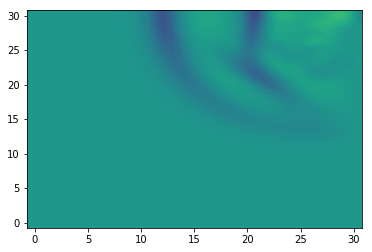

iteration= 180


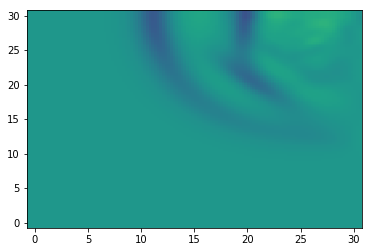

iteration= 190


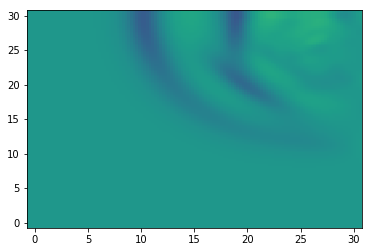

iteration= 200


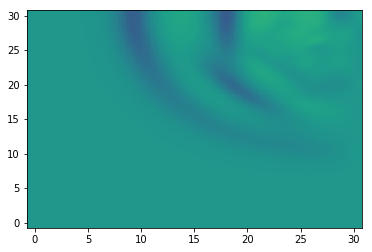

iteration= 210


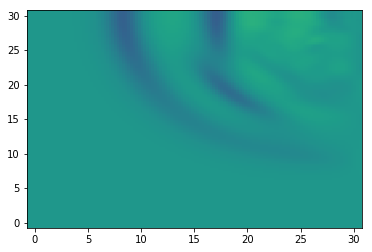

iteration= 220


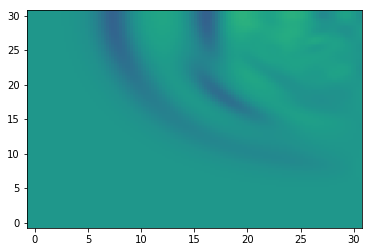

iteration= 230


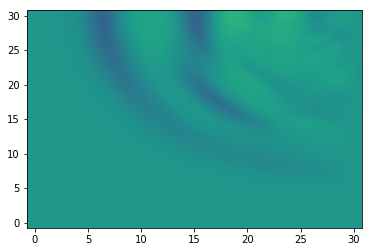

iteration= 240


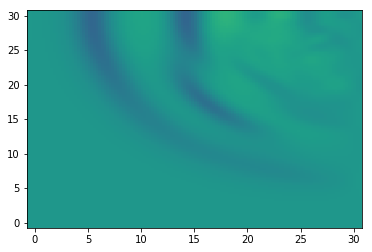

iteration= 250


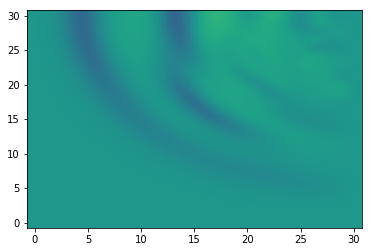

iteration= 260


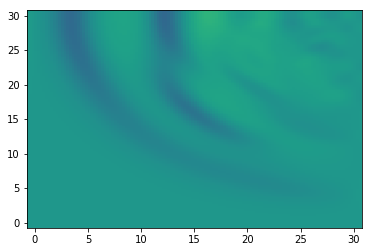

iteration= 270


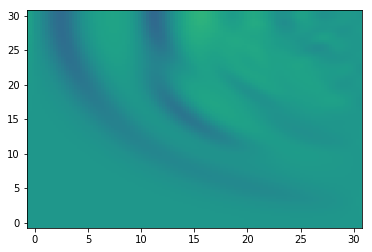

iteration= 280


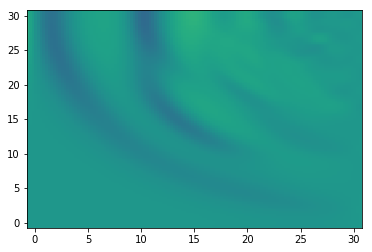

iteration= 290


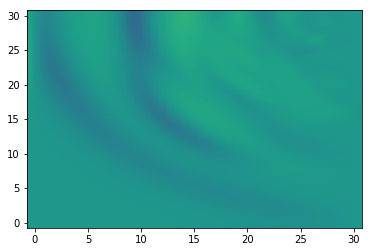

iteration= 300


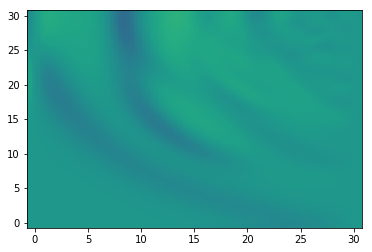

In [83]:
f5 = h5py.File("u.xy.h5")
mn,mx = None,None

# Compute the min and max
for nm in f5:
    if not hasattr(f5[nm],"shape"):
        continue
    d5 = np.copy(f5[nm])
    tmin = np.min(d5)
    tmax = np.max(d5)
    if mn == None:
        mn,mx = tmin,tmax
    else:
        if tmin < mn:
            mn = tmin
        if tmax > mx:
            mx = tmax
            
# Collect all the pieces into the d5_tl dictionary
d5_tl = {}            
for nm in f5:
    if not hasattr(f5[nm],"shape"):
        continue
    # Parse the string nm...
    m = re.search(r'it=(\d+)\s+tl=\d+\s+(rl=(\d+)\s+c=(\d+))',nm)
    # group(1) is the iteration number
    # group(2) is "rl={number} c={number}"
    # group(3) is the number in "rl={number}"
    # group(4) is the number in "c={number}"
    grid = int(m.group(1))
    comp = int(m.group(4))
    k = m.group(2)
    if grid in d5_tl:
        d5_tl[grid]["x"] += [x_coords[k]] # append to the x array
        d5_tl[grid]["y"] += [y_coords[k]] # append to the y array
        d5_tl[grid]["D"] += [f5[nm]] # append to the data array
    else:
        d5_tl[grid] = {
            "x":[x_coords[k]],
            "y":[y_coords[k]],
            "D":[f5[nm]]
        }

# Sort the keys so that we display time levels in order
def keysetf(d):
    a = [] # create an empty list
    for k in d: # for each key in d
        a.append(k) # append it to the list
    return a
kys = keysetf(d5_tl.keys())
kys.sort()

# Show the figures, combing data from the same time level
for index in kys:
    data = d5_tl[index]
    print("iteration=",index)
    plt.figure() # put this before the plots you wish to combine
    plt.pcolor(data["x"][0],data["y"][0],data["D"][0],vmin=mn,vmax=mx)
    plt.pcolor(data["x"][1],data["y"][1],data["D"][1],vmin=mn,vmax=mx)
    plt.show() # show the plot.

Questions and Exercises:

* Run the above simulation using a single process instead of two. Do the plotting routines work? What changes did you have to make. What would you need to do to make it work with 3?
* Run the code at 1/2 the resolution.
* Position the Guassian wave at a different place on the grid.
* If you wanted to change the compiler or a compiler flag, how would you go about doing that?
* If you wanted to add another thorn to the list of thorns to compile, how would you go about doing that?
* If you wanted to change the flags used by the C-compiler to build files, what two ways can you think of to accomplish this?
* If you wanted to create a thornlist that would check out Cactus under the Foo directory instead of the CactusFW2 directory, how would you do it?